In [5]:
# Import necessary libraries
import os
import numpy as np
# Ensure TensorFlow is installed
%pip install tensorflow
# Ensure TensorFlow Keras module is resolved
%pip install keras

# Import TensorFlow and its Keras module
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
from tensorflow.keras import backend as K
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, Activation
from tensorflow.keras.metrics import AUC
from tensorflow.keras.optimizers import Adam

You should consider upgrading via the '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:

import os
import numpy as np
# Ensure pandas is installed
%pip install pandas
# Ensure OpenCV is installed
%pip install opencv-python

import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

labels = ['PNEUMONIA', 'NORMAL']
img_size = 224  # Changed to 224 for EfficientNet

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                # Changed to read in color (3 channels) for EfficientNet
                img_arr = cv2.imread(os.path.join(path, img))
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                if img_arr is not None:
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))
                    data.append([resized_arr, class_num])
                else:
                    print(f"Warning: {img} could not be read.")
            except Exception as e:
                print(f"Error processing {img}: {e}")
    return np.array(data, dtype=object)

# Using forward slashes in paths
train = get_data("/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/train")
test = get_data("/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/test")
val = get_data("/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/val")

# Print dataset sizes
print(f"Training samples: {len(train)}")
print(f"Testing samples: {len(test)}")
print(f"Validation samples: {len(val)}")

You should consider upgrading via the '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Training samples: 5216
Testing samples: 624
Validation samples: 16


In [12]:
from tensorflow.keras.applications import EfficientNetB0
# Data generators with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Image parameters
IMG_SIZE = 224  # EfficientNet preferred size
BATCH_SIZE = 32

# Setup data generators
train_generator = train_datagen.flow_from_directory(
    '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/train',  # Updated path
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)


Found 5216 images belonging to 2 classes.


In [15]:
valid_generator = valid_datagen.flow_from_directory(
    '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/val',  # Updated path
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 16 images belonging to 2 classes.


In [17]:
test_generator = test_datagen.flow_from_directory(
    '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/test',  # Updated path
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Create EfficientNet model
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)


Found 624 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


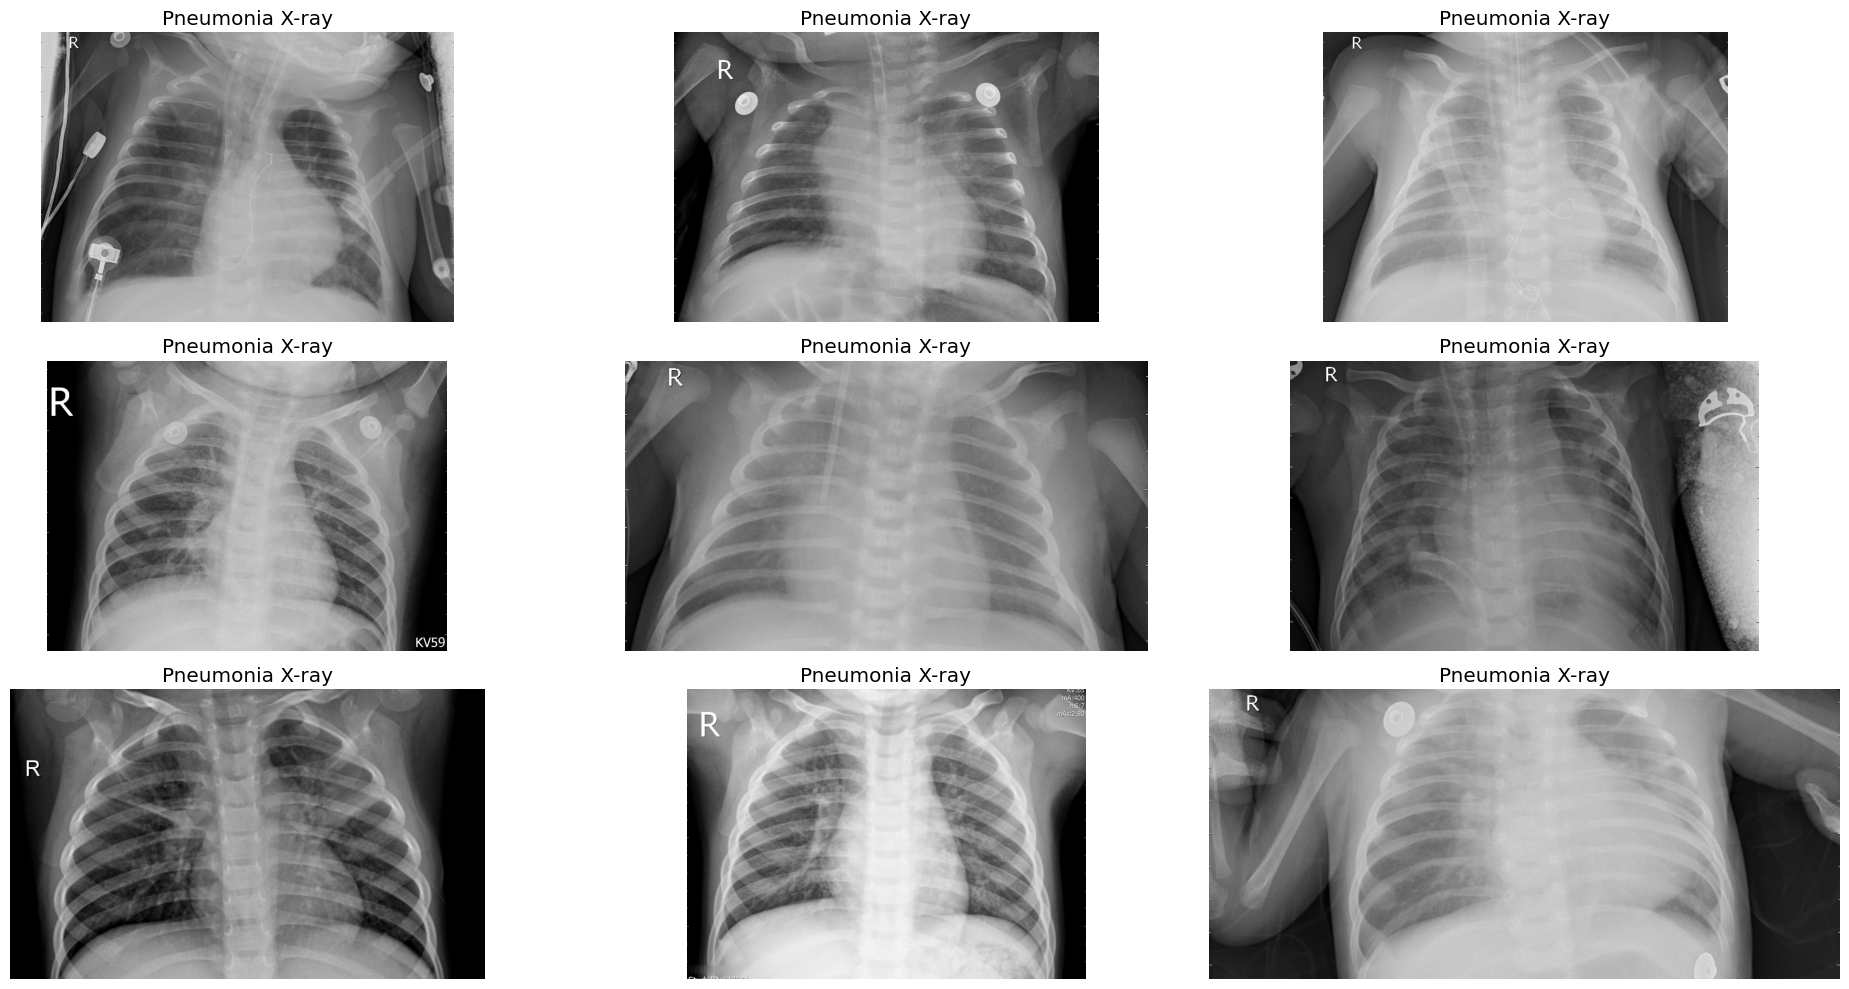

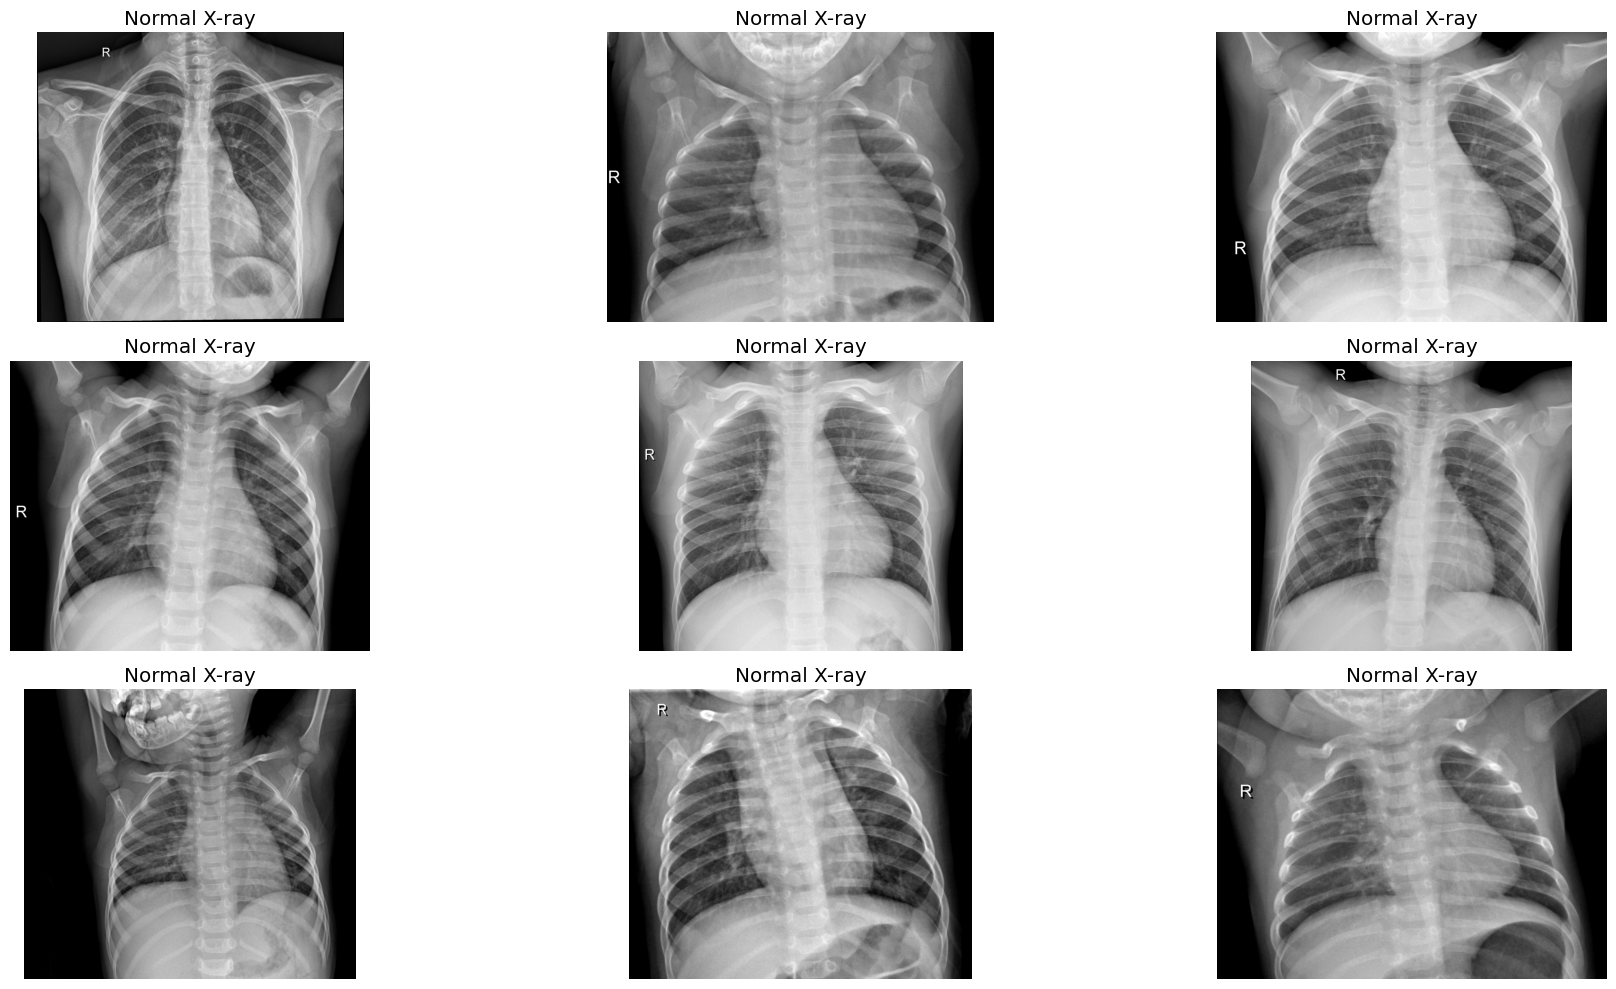

/var/folders/w9/v5r1mtw523q7t8c5p946f6bm0000gn/T/ipykernel_17879/3058511636.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x='Class', y='Count', palette='viridis')


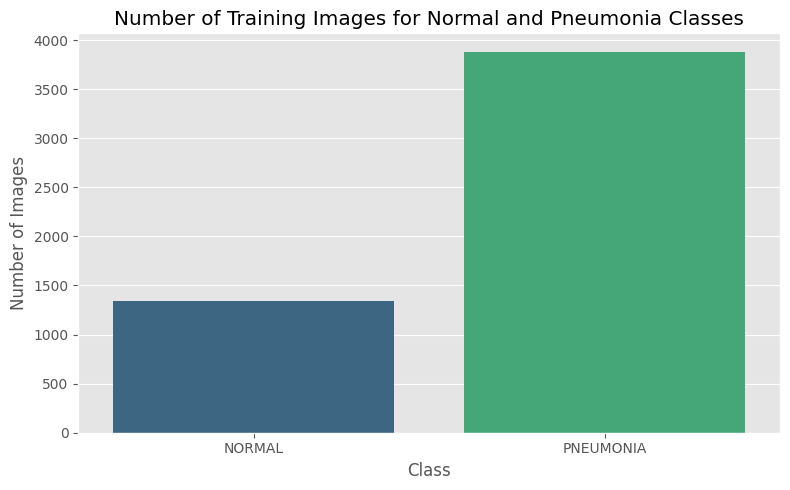

In [25]:
# Load training, testing, and validation data
train = get_data(r"/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/train")
test = get_data(r"/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/test")
val = get_data(r"/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/val")

# Load pneumonia images
pneumonia_dir = r"/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/train/PNEUMONIA"
pneumonia = os.listdir(pneumonia_dir)

# Plot pneumonia images
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Pneumonia X-ray")
plt.tight_layout()
plt.show()

# Load normal images
normal_dir = r"/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/train/NORMAL"
normal = os.listdir(normal_dir)

# Plot normal images
plt.figure(figsize=(20, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Normal X-ray")
plt.tight_layout()
plt.show()

# Function to count images for specific classes
def count_images(directory, classes):
    class_counts = {}
    for class_name in classes:
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Specify the classes to count
classes_to_count = ['NORMAL', 'PNEUMONIA']

# Count images in the training set
train_counts = count_images(r"/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/train", classes_to_count)

# Create a DataFrame for plotting
df_counts = pd.DataFrame(list(train_counts.items()), columns=['Class', 'Count'])

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=df_counts, x='Class', y='Count', palette='viridis')
plt.title('Number of Training Images for Normal and Pneumonia Classes')
plt.ylabel('Number of Images')
plt.xlabel('Class')
plt.tight_layout()
plt.show()

In [8]:
# Required imports
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import os

# 1. Load the base model and unfreeze selected layers
from tensorflow.keras.applications import ResNet50  # Example: Using ResNet50 as the base model

base_model = ResNet50(weights='imagenet', include_top=False)  # Load pre-trained ResNet50
base_model.trainable = True
for layer in base_model.layers[:150]:
    layer.trainable = False

# 2. Model architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
outputs = Dense(2, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=outputs)

# 3. Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Setup data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/train',  # Replace with the actual path to your training data
    target_size=(224, 224),  # Replace with the input size expected by your model
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/chest_xray/val',  # Replace with the actual path to your validation data
    target_size=(224, 224),  # Replace with the input size expected by your model
    batch_size=32,
    class_mode='categorical'
)

# Compute class weights
class_indices = train_generator.classes
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(class_indices),
    y=class_indices
)
class_weight_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weight_dict)


# 5. Setup checkpoint directory
checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# 6. Define callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=8,
        restore_best_weights=True,
        min_delta=0.001
    ),
    ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.1,
        patience=4,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'best_model.keras'),
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'latest_checkpoint.keras'),
        monitor='val_accuracy',
        save_best_only=False,
        save_weights_only=False,
        verbose=1
    )
]

# 7. Resume setup
resume_checkpoint = os.path.join(checkpoint_dir, 'latest_checkpoint.keras')
epoch_log_file = os.path.join(checkpoint_dir, 'last_epoch.txt')

if os.path.exists(resume_checkpoint):
    print("Resuming training from latest checkpoint...")
    model = load_model(resume_checkpoint)
    if os.path.exists(epoch_log_file):
        with open(epoch_log_file, 'r') as f:
            initial_epoch = int(f.read().strip()) + 1
        print(f"Resuming from epoch {initial_epoch}")


# 8. Training the model
# Ensure Pillow is installed
from PIL import Image  # Pillow is now installed, this won't throw ImportError

EPOCHS = 50
for epoch_chunk in range(initial_epoch, EPOCHS):
    history = model.fit(
        train_generator,
        epochs=epoch_chunk + 1,
        initial_epoch=epoch_chunk,
        validation_data=valid_generator,
        callbacks=callbacks,
        class_weight=class_weight_dict,
        verbose=1
    )




Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Class Weights: {0: np.float64(1.9448173005219984), 1: np.float64(0.6730322580645162)}


/Users/devanshuurmaliya/Downloads/PenmoNet_V2_Project/env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7213 - loss: 0.6195
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to checkpoints/best_model.keras

Epoch 1: saving model to checkpoints/latest_checkpoint.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.7216 - loss: 0.6191 - val_accuracy: 0.5000 - val_loss: 0.7072 - learning_rate: 1.0000e-04
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7955 - loss: 0.4892
Epoch 2: val_accuracy improved from 0.50000 to 0.62500, saving model to checkpoints/best_model.keras

Epoch 2: saving model to checkpoints/latest_checkpoint.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.7956 - loss: 0.4890 - val_accuracy: 0.6250 - val_loss: 0.5744 - learning_rate: 1.0000e-04
Epoch 3/3
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8432 - loss: 0.3911
Epoch 3: val_accuracy did not improve from 0.62500

Epoch 3: saving model to checkpoints/latest_checkpoint.keras
163/163 ━━━━━━━━━━━━━━━━━━━━ 3

In [9]:
from tensorflow.keras.models import load_model

# Load best saved model
best_model = load_model("checkpoints/best_model.keras")

# Evaluate on validation or test set
val_loss, val_acc = best_model.evaluate(valid_generator)
print(f"Best Model Accuracy: {val_acc:.4f}, Loss: {val_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8750 - loss: 0.4349
Best Model Accuracy: 0.8750, Loss: 0.4349


In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_pred_probs = best_model.predict(valid_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = valid_generator.classes

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         8
           1       0.50      0.50      0.50         8

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.50        16
weighted avg       0.50      0.50      0.50        16

Confusion Matrix:
 [[4 4]
 [4 4]]


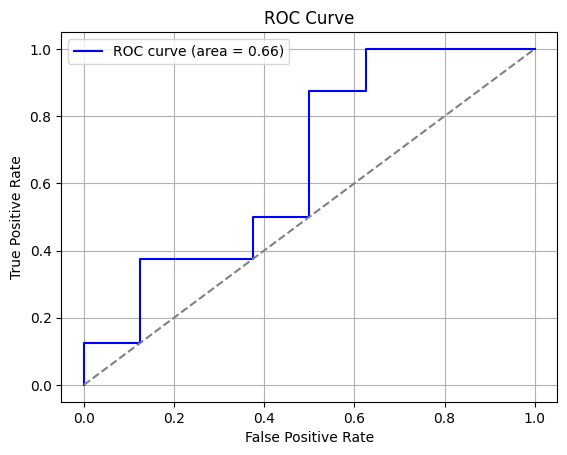

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


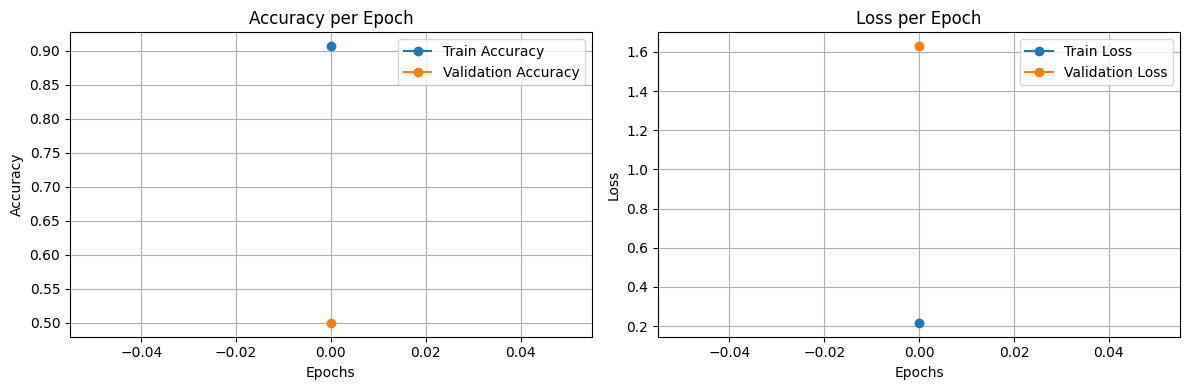

In [12]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


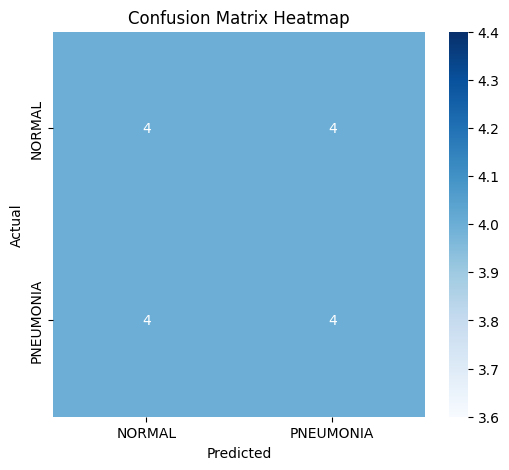

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=valid_generator.class_indices.keys(), yticklabels=valid_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [14]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


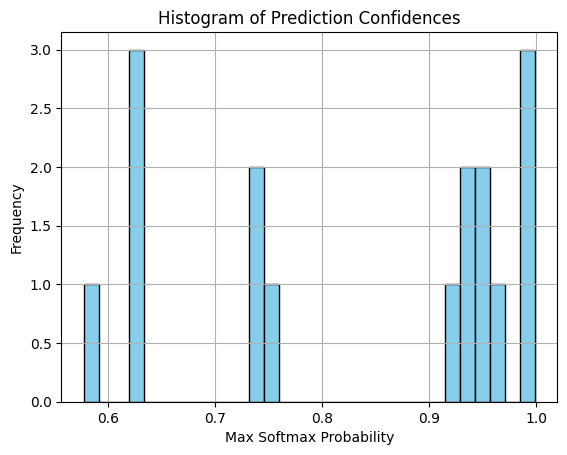

In [ ]:
plt.hist(np.max(y_pred_probs, axis=1), bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Prediction Confidences")
plt.xlabel("Max Softmax Probability")
plt.ylabel("Frequency")
plt.grid()
plt.show()
